# Setup

In [6]:
!pip install --upgrade scipy networkx

In [126]:
import networkx as nx

In [127]:
G=nx.Graph()

# Nodes

In [128]:
G.add_node(1)

In [129]:
G.add_nodes_from([2,4])

In [130]:
H = nx.path_graph(8)
G.add_nodes_from(H)

In [131]:
G.add_node(H)

# Edges

In [132]:
G.add_edge(1, 2)
e = (2, 4)
G.add_edge(*e)

In [133]:
G.add_edges_from([(1, 2), (1, 4)])

In [134]:
G.add_edges_from(H.edges)

In [135]:
G.clear()

In [136]:
G.add_edges_from([(1, 3), (2, 4)])
G.add_node(1)
G.add_edge(1, 3)
G.add_node("ss")
G.add_nodes_from("ss")
G.add_edge(3, 'm')

In [137]:
G.number_of_nodes()

7

In [138]:
G.number_of_edges()

3

In [139]:
DG=nx.DiGraph()
DG.add_edge(2,1)
DG.add_edge(2,3)
DG.add_edge(1,4)
DG.add_edge(3,4)
assert list(DG.successors(2))==[1,3]
assert list(DG.edges)==[(2,1),(2,3),(1,4),(3,4)]

# Examining elements of a graph

In [140]:
list(G.nodes)

[1, 3, 2, 4, 'ss', 's', 'm']

In [141]:
list(G.edges)

[(1, 3), (3, 'm'), (2, 4)]

In [142]:
list(G.adj[1])

[3]

In [143]:
G.degree[1]

1

In [144]:
G.edges([2, 'm'])

EdgeDataView([(2, 4), ('m', 3)])

In [145]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

# Removing elements from a graph

In [146]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 4, 'ss']

In [147]:
G.remove_edge(1, 3)
G.edges

EdgeView([])

# Using the graph constructors

In [148]:
G.add_edge(1, 2)
H=nx.DiGraph(G)
list(H.edges())

[(1, 2), (2, 1)]

In [149]:
edgelist=[(0,2),(2,3),(3,1)]
H = nx.Graph(edgelist)
list(H.edges())

[(0, 2), (2, 3), (3, 1)]

# Accessing edges and neighbors

In [150]:
adjacency_dict = {0: (2, 3), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)
list(H.edges())

[(0, 2), (0, 3), (0, 1), (1, 2)]

In [151]:
G = nx.Graph([(1, 2, {"color": "red"})])
G[1]  
G[1][2]
G.edges[1, 2]

{'color': 'red'}

In [161]:
G.add_edge(1, 0)
G[1][0]['color'] = "black"
G.edges[1, 0]

{'color': 'black'}

In [162]:
G.edges[2, 1]['color'] = "green"
G.edges[2, 1]

{'color': 'green'}

In [179]:
FG=nx.Graph()
FG.add_weighted_edges_from([(1, 0, 0.5), (0, 2, 0.8), (2, 1, 1), (2, 3, 1.5)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 1: print(f"({n}, {nbr}, {wt:.3})")

(1, 0, 0.5)
(0, 1, 0.5)
(0, 2, 0.8)
(2, 0, 0.8)


In [180]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 1:
        print(f"({u}, {v}, {wt:.3})")

(1, 0, 0.5)
(0, 2, 0.8)


# Graph attributes

In [185]:
G = nx.Graph(day="Sunday")
G.graph

{'day': 'Sunday'}

In [186]:
G.graph['day'] = "Tuesday"
G.graph

{'day': 'Tuesday'}

# Node attributes

In [187]:
G.add_node(2, time='6am')
G.add_nodes_from([1], time='10am')
G.nodes[2]
G.nodes[2]['room'] = 20
G.nodes.data()

NodeDataView({2: {'time': '6am', 'room': 20}, 1: {'time': '10am'}})

# Edge Attributes


In [189]:
G.add_edge(1,2,weight=2.5)
G.add_edges_from([(3,4),(4,5)],color='black')
G.add_edges_from([(1,2,{'color':'green'}),(2,3,{'weight':5})])
G[1][2]['weight']=1
G.edges[3, 4]['weight']=4.5

In [190]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 1), (3, 1, 3)])
DG.out_degree(1, weight='weight')


1

In [191]:
DG.degree(1, weight='weight')

4

In [192]:
list(DG.successors(1))

[2]

In [195]:
list(DG.neighbors(3))

[1]

In [196]:
H = nx.Graph(G)

# Multigraphs

In [203]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (3, 2, 0.8), (2, 3, 0.3)])
dict(MG.degree(weight='weight'))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

# Graph generators and graph operations

In [204]:
K_5 = nx.complete_graph(7)
K_3_5 = nx.complete_bipartite_graph(2, 6)
barbell = nx.barbell_graph(10, 15)
lollipop = nx.lollipop_graph(13, 20)

In [205]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

In [206]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

In [207]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("sa")
list(nx.connected_components(G))
sorted(d for n, d in G.degree())
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [209]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[2]

{2: [2], 1: [2, 1], 3: [2, 1, 3]}

# Drawing graphs


In [210]:
import matplotlib.pyplot as plt

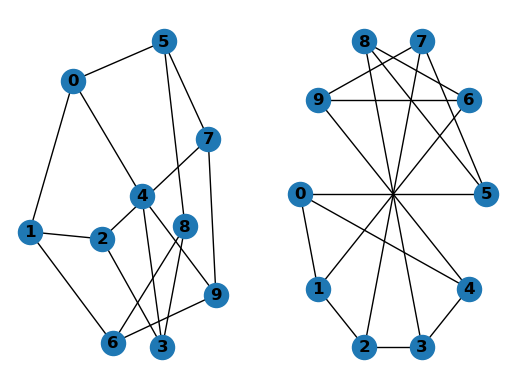

In [218]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(4, 10), range(10)], with_labels=True, font_weight='bold')

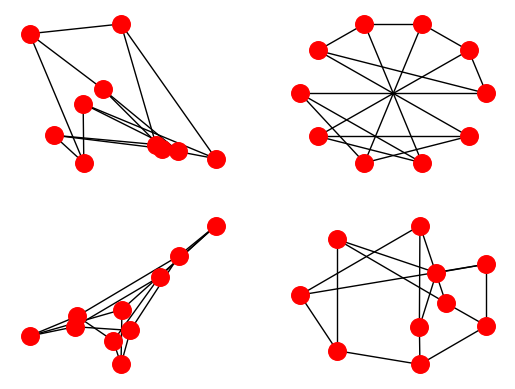

In [237]:
options = {
    'node_color': 'red',
    'node_size': 160,
    'width': 1,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(3,10), range(7)], **options)

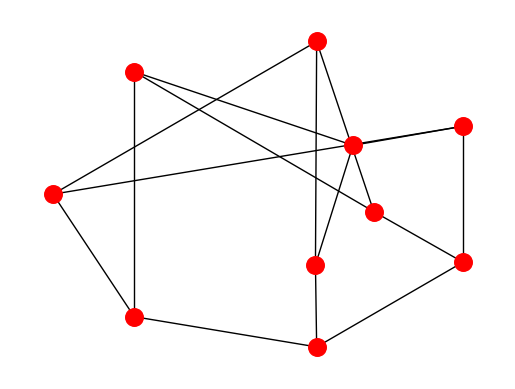

In [238]:
subax5 = plt.subplot(111)
nx.draw_shell(G, nlist=[range(3,10), range(7)], **options)

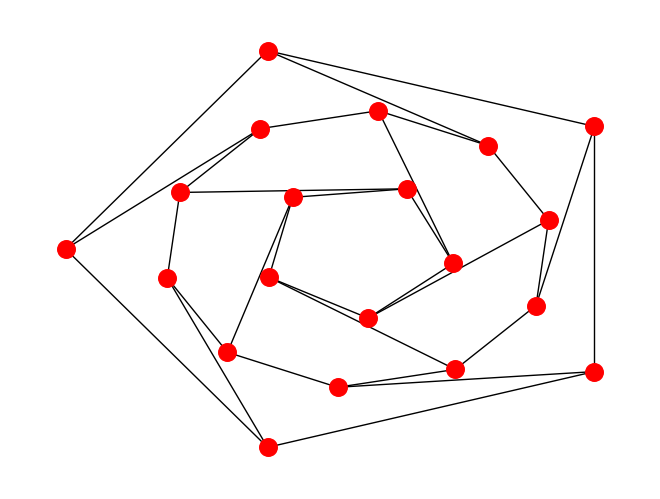

In [239]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

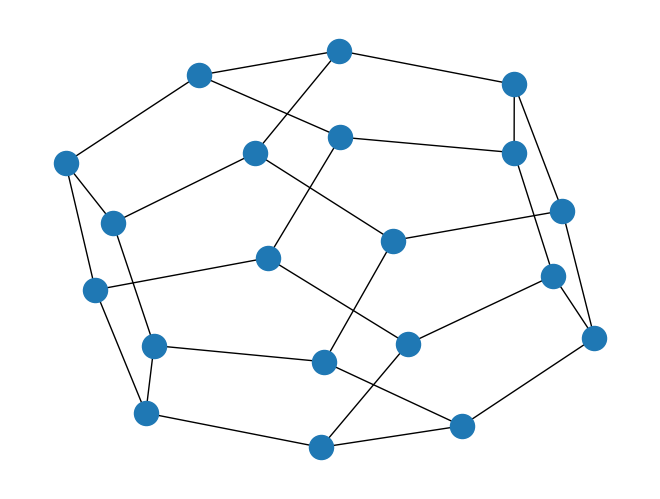

In [240]:
nx.draw(G)
plt.savefig("path.png")